In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


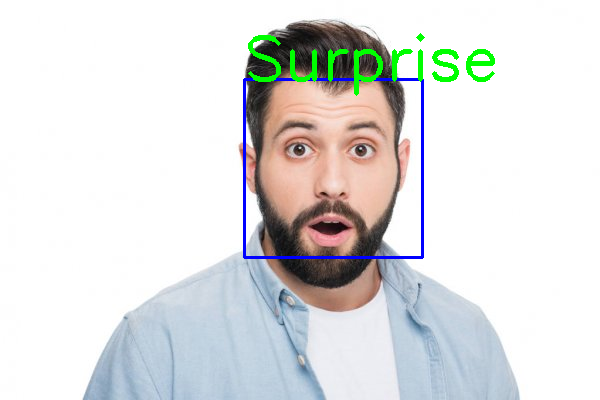

In [4]:
face_classifier=cv2.CascadeClassifier('/content/drive/MyDrive/SureStartTrainingData/haarcascade_frontalface_default.xml')
classifier = load_model('/content/drive/MyDrive/SureStartTrainingData/EmotionDetectionModel.h5')
class_labels=['Angry','Happy','Neutral','Sad','Surprise']

frame = cv2.imread('/content/surprise.jpg') 
labels=[]
gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces=face_classifier.detectMultiScale(gray,1.3,5)

for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

    if np.sum([roi_gray])!=0:
        roi=roi_gray.astype('float')/255.0
        roi=img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)

        preds=classifier.predict(roi)[0]
        label=class_labels[preds.argmax()]
        label_position=(x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    else:
        cv2.putText(frame,'No Face Found',(20,20),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)

cv2_imshow(frame)

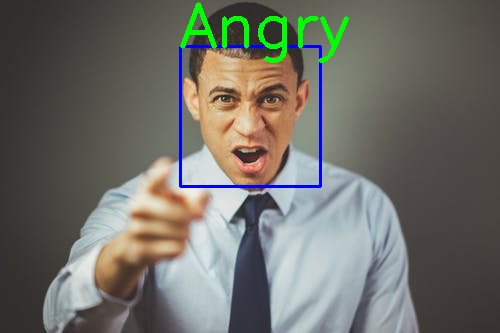

In [5]:
frame = cv2.imread('/content/angry.jpeg') 
labels=[]
gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces=face_classifier.detectMultiScale(gray,1.3,5)

for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

    if np.sum([roi_gray])!=0:
        roi=roi_gray.astype('float')/255.0
        roi=img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)

        preds=classifier.predict(roi)[0]
        label=class_labels[preds.argmax()]
        label_position=(x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    else:
        cv2.putText(frame,'No Face Found',(20,20),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)

cv2_imshow(frame)